# Distribution Explorer
The purpose of this script is to provide a simple interface to explore what certain distribututions look like under different parameterizations. This can be helpful when generating fake datasets for simulation purposes but can also be helpful in better understanding the data generating process behind real world data. Only a handful of distributions are provided as these were deemed to be the most useful.

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy

renderer = 'svg'

# Discrete Probability Distributions

## Binomial Distribution (number of successes heads out of n coin flips)
__n__: number of times the coin is flipped in the experiment <br>
__p__: probability the coin flip is a success

Note that the numpy function below returns the number of successes out of n trials and not whether each flip was a success or not (that would be bernoulli)

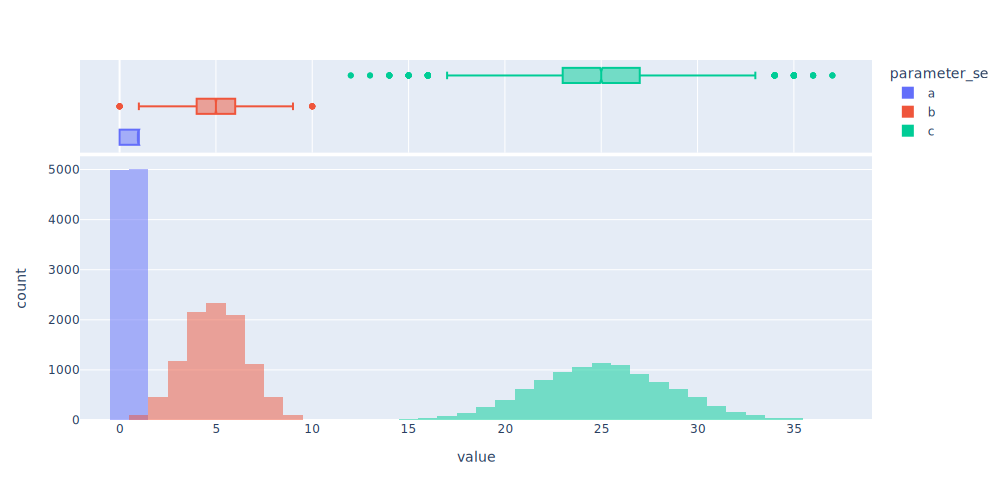

In [14]:
N = 10000

a = np.random.binomial(n= 1, p =.5, size = N)
b = np.random.binomial(n = 10, p =.5, size = N)
c = np.random.binomial(n = 50, p = .5, size = N)

df = pd.DataFrame({'a':a,'b':b,'c':c}, columns = ['a','b','c'])
df = pd.melt(df, var_name = 'parameter_set', value_name = 'value')
hist_data = [a,b,c]
group_labels = ['a','b','c']

fig = px.histogram(df, x = 'value', color = 'parameter_set', marginal= 'box', opacity = .5)
fig.update_layout(height = 500, width = 1000, barmode = 'overlay')
fig.show(renderer)


## Negative Binomial
The negative binomial distribution is concerned with the number of failures occur before a specific number of successes take place with a bernoulli random variable <br>

__n__: number of successes <br>
__p__: success probability

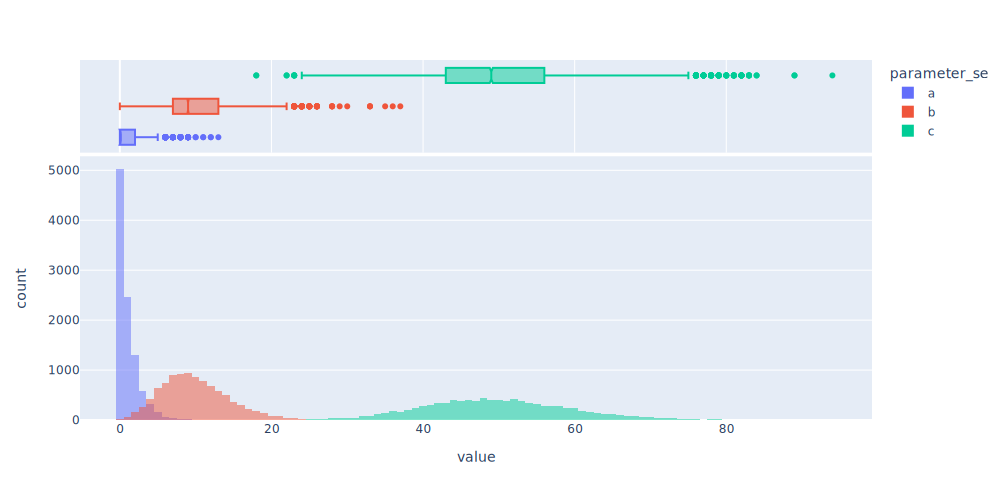

In [15]:
from locale import normalize


N = 10000

a = np.random.negative_binomial(n= 1, p =.5, size = N)
b = np.random.negative_binomial(n = 10, p =.5, size = N)
c = np.random.negative_binomial(n = 50, p = .5, size = N)

df = pd.DataFrame({'a':a,'b':b,'c':c}, columns = ['a','b','c'])
df = pd.melt(df, var_name = 'parameter_set', value_name = 'value')
hist_data = [a,b,c]
group_labels = ['a','b','c']

fig = px.histogram(df, x = 'value', color = 'parameter_set', marginal= 'box', opacity = .5)
fig.update_layout(height = 500, width = 1000, barmode = 'overlay')
fig.show(renderer)


# Continuous Probability Distributions

### Normal Distirbution (Bell Curve)
__loc__: Mean/center of the normal distribution <br>
__scale__: Scale of the spread of the normal distribution. This is also the standard deviation and should be greater than 0

#### Multiple Normal Distributions at a glance

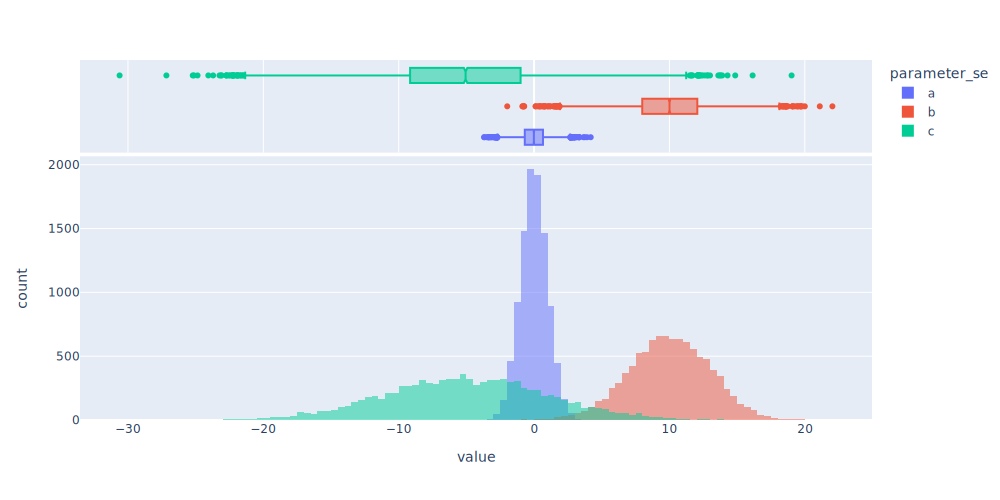

In [16]:
n = 10000

a = np.random.normal(loc = 0, scale = 1, size = n)
b = np.random.normal(loc = 10, scale = 3, size = n)
c = np.random.normal(loc = -5, scale = 6, size = n)

df = pd.DataFrame({'a':a,'b':b,'c':c}, columns = ['a','b','c'])
df = pd.melt(df, var_name = 'parameter_set', value_name = 'value')
hist_data = [a,b,c]
group_labels = ['a','b','c']

fig = px.histogram(df, x = 'value', color = 'parameter_set', marginal= 'box', opacity = .5)
fig.update_layout(height = 500, width = 1000, barmode = 'overlay')
fig.show(renderer)


#### Deeper Look at a user defined Normal Distribution

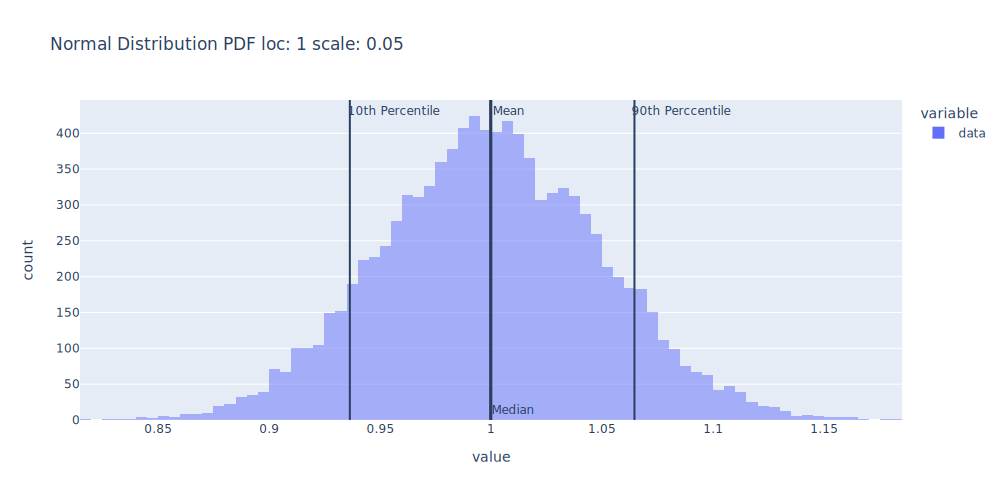

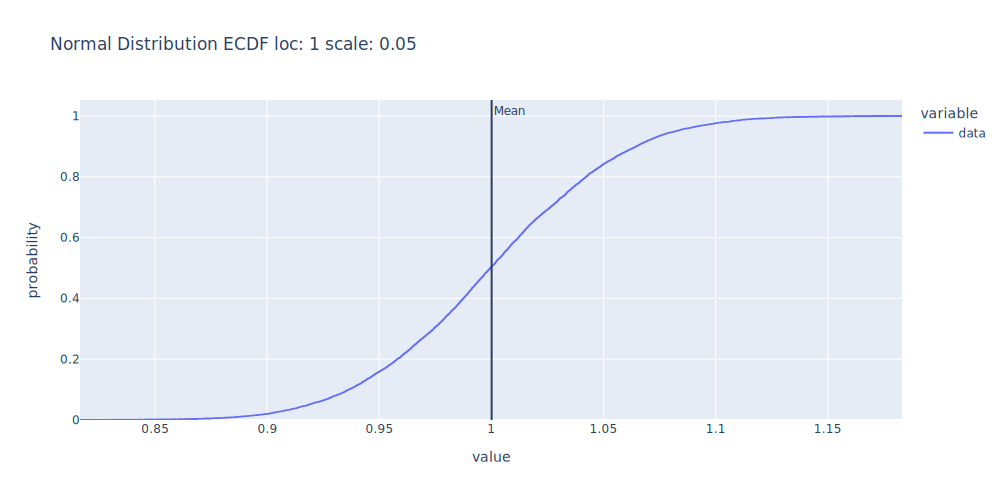

In [17]:
n = 10000
loc = 1
scale = .05

df = pd.DataFrame(np.random.normal(loc = loc, scale = scale, size = n), columns =['data'])

fig = px.histogram(df.data, opacity = .5, title= "Normal Distribution PDF    loc: " + str(loc) + "   scale: " + str(scale))
fig.update_layout(height = 500, width= 1000)
fig.add_vline(x = df.data.mean(), annotation_text = "Mean")
fig.add_vline(x = df.data.median(), annotation_text = 'Median', annotation_position = 'bottom right')
fig.add_vline(x = df.data.quantile(.1), annotation_text = "10th Percentile")
fig.add_vline(x = df.data.quantile(.9), annotation_text = "90th Perccentile")
fig.show(renderer)

fig = px.ecdf(df.data, title = "Normal Distribution ECDF    loc: " + str(loc) + "   scale: " + str(scale))
fig.update_layout(height = 500, width= 1000)
fig.add_vline(x = df.data.mean(), annotation_text = "Mean")
fig.show(renderer)


### Gamma 
The gamma distribution is commonly used to model waiting times. It is also commonly used in Bayesian statistics where it is used as a conjugate prior for rate variables.

__shape__: Shape of the gammna distribution, should be greater than 0 <br>
__scale__: Scale of the gamma distribution, should also be greater than 0

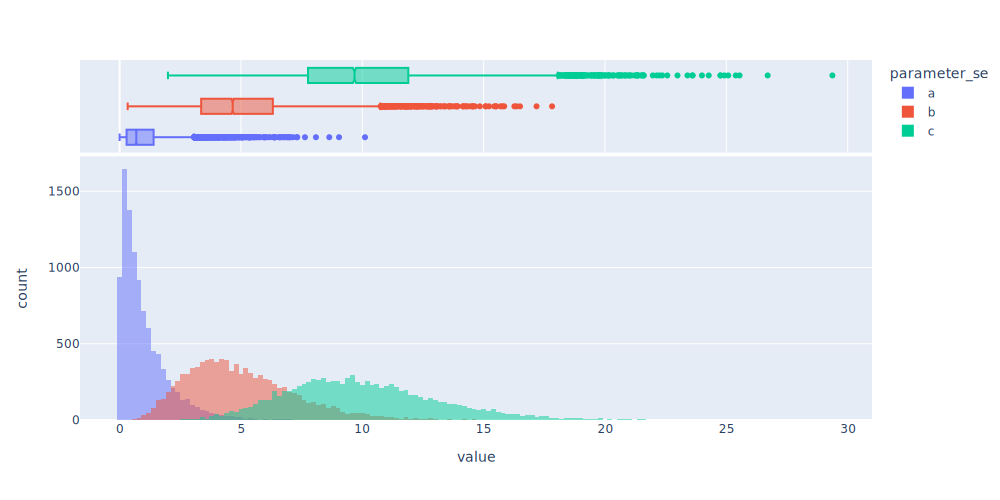

In [18]:
n = 10000

a = np.random.gamma(shape = 1, scale = 1, size = n)
b = np.random.gamma(shape = 5, scale = 1, size = n)
c = np.random.gamma(shape = 10, scale = 1, size = n)

df = pd.DataFrame({'a':a,'b':b,'c':c}, columns = ['a','b','c'])
df = pd.melt(df, var_name = 'parameter_set', value_name = 'value')
hist_data = [a,b,c]
group_labels = ['a','b','c']

fig = px.histogram(df, x = 'value', color = 'parameter_set', marginal= 'box', opacity= .5)
fig.update_layout(height = 500, width = 1000, barmode = 'overlay')
fig.show(renderer)


#### Deeper look at a user defined gamma distribution

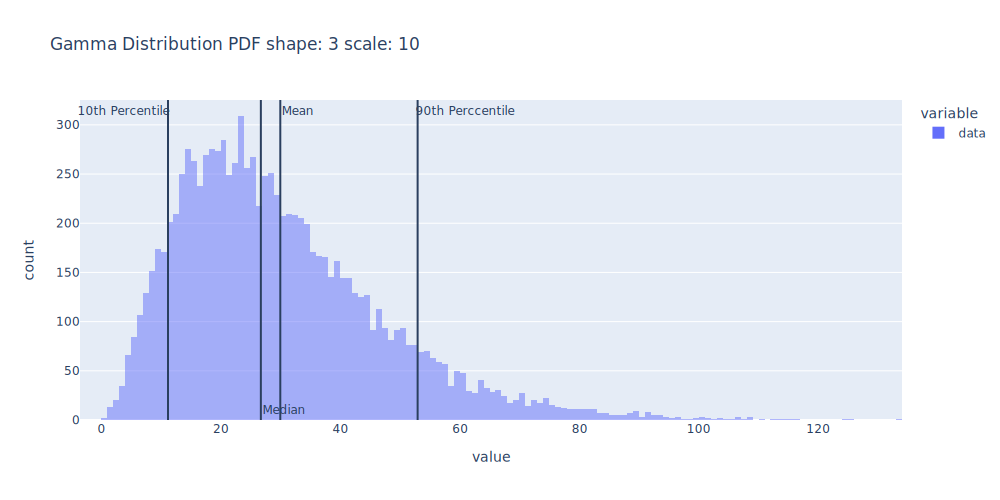

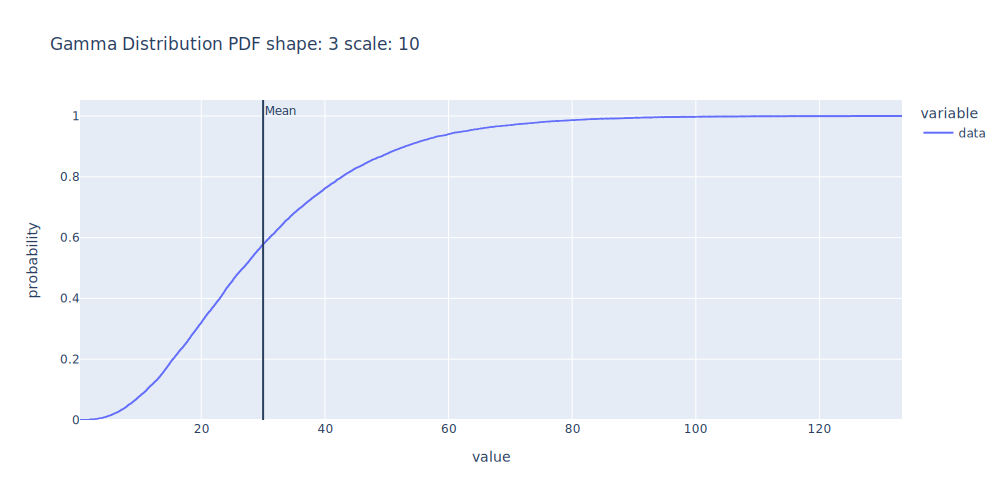

In [19]:
n = 10000
shape = 3
scale = 10

df = pd.DataFrame(np.random.gamma(shape = shape, scale = scale, size = n), columns =['data'])

fig = px.histogram(df.data, opacity = .5, title= "Gamma Distribution PDF    shape: " + str(shape) + "   scale: " + str(scale))
fig.update_layout(height = 500, width= 1000)
fig.add_vline(x = df.data.mean(), annotation_text = "Mean", annotation_position = 'top right')
fig.add_vline(x = df.data.median(), annotation_text = 'Median', annotation_position = 'bottom right')
fig.add_vline(x = df.data.quantile(.1), annotation_text = "10th Percentile", annotation_position = 'top left')
fig.add_vline(x = df.data.quantile(.9), annotation_text = "90th Perccentile")
fig.show(renderer)

fig = px.ecdf(df.data, title = "Gamma Distribution PDF    shape: " + str(shape) + "   scale: " + str(scale))
fig.update_layout(height = 500, width= 1000)
fig.add_vline(x = df.data.mean(), annotation_text = "Mean")
fig.show(renderer)

#### Power Law Distribution
Power law distributions are common in online settings. They are often the result of processes that contain feedback loops. One such example would be an amazon product being purchased because it has the most positive reviews... this leads to more positive reviews which reinforces the probability that it will be puirchased by future custoimers. Look up Zipf's law.<br>

__a__: The only parameter of the distribution. Should be greater than zero.


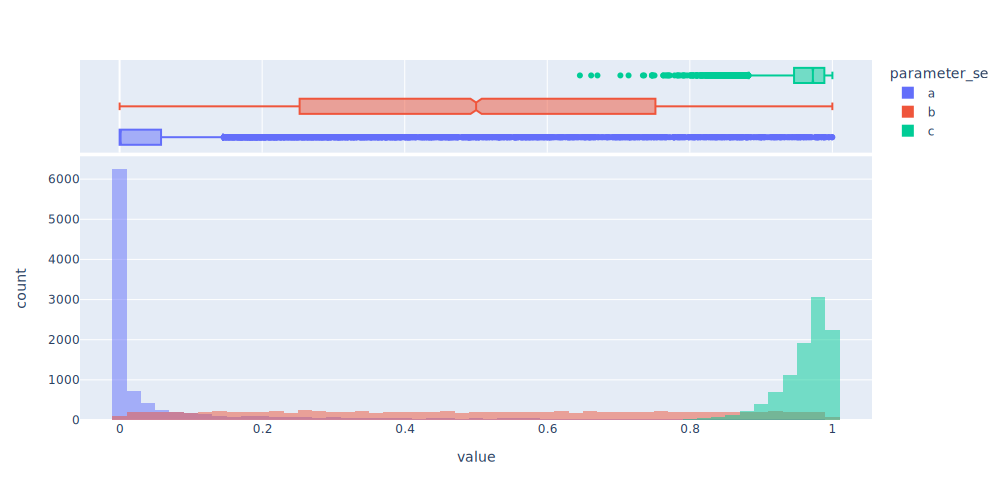

In [20]:
n = 10000

a = np.random.power(a = .1, size = n)
b = np.random.power(a = 1, size = n)
c = np.random.power(a = 25, size = n)

df = pd.DataFrame({'a':a,'b':b,'c':c}, columns = ['a','b','c'])
df = pd.melt(df, var_name = 'parameter_set', value_name = 'value')
hist_data = [a,b,c]
group_labels = ['a','b','c']

fig = px.histogram(df, x = 'value', color = 'parameter_set', marginal= 'box', opacity= .5)
fig.update_layout(height = 500, width = 1000, barmode = 'overlay')
fig.show(renderer)



#### The Beta Distribution 
The Beta distribution is definedd on the interval [0,1] and as such is often used to model random variables that exist on an continuous interval. In Bayesian inference, it is commonly used as the conjugate prior for the bernoulli, binomial, negative binomial and geometric distributions <br>

__alpha__: Strictly positive <br>
__beta__: Strictly positive

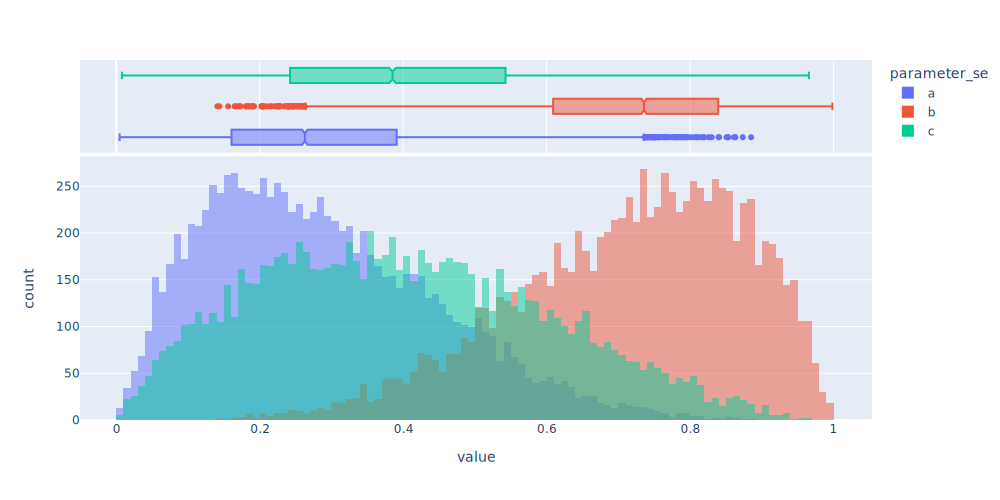

In [21]:
n = 10000

a = np.random.beta(a = 2, b = 5, size = n)
b = np.random.beta(a = 5, b = 2, size = n)
c = np.random.beta(a = 2, b = 3, size = n)

df = pd.DataFrame({'a':a,'b':b,'c':c}, columns = ['a','b','c'])
df = pd.melt(df, var_name = 'parameter_set', value_name = 'value')
hist_data = [a,b,c]
group_labels = ['a','b','c']

fig = px.histogram(df, x = 'value', color = 'parameter_set', marginal= 'box', opacity= .5)
fig.update_layout(height = 500, width = 1000, barmode = 'overlay')
fig.show(renderer)
